In [1]:
# # Cordis EU research project under FP5

# This dataset contains all projects funded by the European Union under the fifth framework programme for research and 
# technological development (FP5) from 1998 to 2002.

# The file 'FP5 Projects' contains the public grant information for each project, including the following information: 
# Record Control Number (RCN), project ID (grant agreement number), project acronym, project status, funding programme, 
# topic, project title, project start date, project end date, project objective, project total cost, EC max contribution 
# (commitment), call ID, funding scheme (type of action), coordinator, coordinator country, participants (ordered in a 
# semi-colon separated list), participant countries (ordered in a semi-colon separated list).

# The participating organisations are listed in the file 'FP5 Organisations' which includes: project Record Control Number 
# (RCN), project ID, project acronym, organisation role, organisation ID, organisation name, organisation short name, 
# organisation type, participation ended (true/false), EC contribution, organisation country.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import plotly.graph_objects as go

In [3]:
data = pd.read_csv("cordis_fp5organizations.csv")

In [4]:
data.head()

,projectRcn,projectID,projectAcronym,role,id,name,shortName,activityType,endOfParticipation,ecContribution,...,organizationUrl,vatNumber,contactForm,contactType,contactTitle,contactFirstNames,contactLastNames,contactFunction,contactTelephoneNumber,contactFaxNumber
0,67894,HPRN-CT-2002-00284,SMART SYSTEMS,participant,NaN,UNIVERSIDADE DE SANTIAGO DE COMPOSTELA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,67894,HPRN-CT-2002-00284,SMART SYSTEMS,participant,NaN,INSTITUT NATIONAL DE RECHERCHE EN INFORMATIQUE...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67894,HPRN-CT-2002-00284,SMART SYSTEMS,participant,NaN,INSTITUTO SUPERIOR TECNICO,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67894,HPRN-CT-2002-00284,SMART SYSTEMS,participant,NaN,ARISTOTLE UNIVERSITY OF THESSALONIKI,NaN,NaN,NaN,NaN,...,THESSALONIKI,54006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67894,HPRN-CT-2002-00284,SMART SYSTEMS,participant,NaN,NATIONAL RESEARCH COUNCIL OF ITALY,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.isnull().sum()

projectRcn                    0
projectID                     0
projectAcronym              883
role                          0
id                        16848
name                        114
shortName                 15565
activityType              16790
endOfParticipation        16879
ecContribution            16890
country                     924
street                      638
city                        194
postCode                    883
organizationUrl           11813
vatNumber                 16036
contactForm               16767
contactType               16881
contactTitle              16890
contactFirstNames         16891
contactLastNames          16891
contactFunction           16891
contactTelephoneNumber    16891
contactFaxNumber          16891
dtype: int64

<AxesSubplot:>

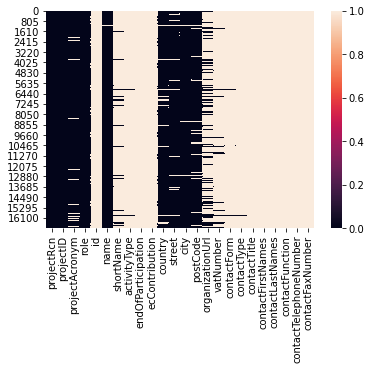

In [6]:
sns.heatmap(data.isnull())

In [7]:
data.drop('id', axis =1, inplace = True)
data.drop('shortName', axis =1, inplace = True)
data.drop('activityType', axis =1, inplace = True)
data.drop('endOfParticipation', axis =1, inplace = True)
data.drop('ecContribution', axis =1, inplace = True)
data.drop('organizationUrl', axis =1, inplace = True)
data.drop('vatNumber', axis =1, inplace = True)
data.drop('contactForm', axis =1, inplace = True)
data.drop('contactType', axis =1, inplace = True)
data.drop('contactTitle', axis =1, inplace = True)
data.drop('contactFirstNames', axis =1, inplace = True)
data.drop('contactLastNames', axis =1, inplace = True)
data.drop('contactFunction', axis =1, inplace = True)
data.drop('contactTelephoneNumber', axis =1, inplace = True)
data.drop('contactFaxNumber', axis =1, inplace = True)

In [8]:
data = data[~data['postCode'].str.contains("[a-zA-Z]").fillna(False)]

<AxesSubplot:>

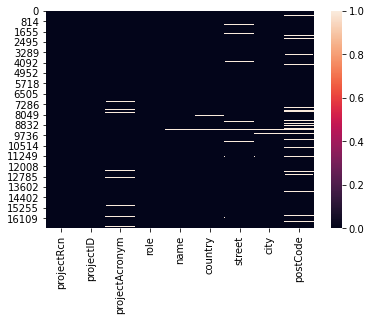

In [9]:
sns.heatmap(data.isnull())

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10341 entries, 0 to 16887
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   projectRcn      10341 non-null  int64 
 1   projectID       10341 non-null  object
 2   projectAcronym  9838 non-null   object
 3   role            10341 non-null  object
 4   name            10260 non-null  object
 5   country         10204 non-null  object
 6   street          9875 non-null   object
 7   city            10172 non-null  object
 8   postCode        9458 non-null   object
dtypes: int64(1), object(8)
memory usage: 807.9+ KB


In [11]:
data.describe(include = 'all')

,projectRcn,projectID,projectAcronym,role,name,country,street,city,postCode
count,10341.000000,10341,9838,10341,10260,10204,9875,10172,9458
unique,NaN,2274,2058,10,5841,107,6685,2544,3707
top,NaN,IST-2000-26048,EURON,participant,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE,DE,HANSASTRASSE 27C,ROMA,1000
freq,NaN,95,95,8792,125,2018,53,251,80
mean,61879.816749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5659.025379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,51164.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,57419.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,60720.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,68957.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(data.columns)
print(len(data.columns))

Index(['projectRcn', 'projectID', 'projectAcronym', 'role', 'name', 'country',
       'street', 'city', 'postCode'],
      dtype='object')
9


## Analysis part begins from here

In [13]:
# 1. how many different types of roles are there and what are top roles

In [14]:
data['role'].unique()

array(['participant', 'coordinator', ' CLAUDIO', ' STEFAN', ' ANNEMIE',
       ' KATHARINA', ' SARAH FRANCE', ' ULRIKE', ' ROBERT',
       ' GESINE 09/10/1'], dtype=object)

In [15]:
role = data.groupby('role')[['role']].count()

In [16]:
role

,role
role,
ANNEMIE,1
CLAUDIO,1
GESINE 09/10/1,1
KATHARINA,1
ROBERT,1
SARAH FRANCE,1
STEFAN,1
ULRIKE,1
coordinator,1541


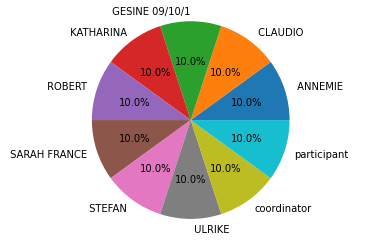

In [17]:
value = [1,1,1,1,1,1,1,1,1,1]
plt.pie(value,labels=role.index,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [18]:
# 2. What is the coordinator to participant ratio

In [19]:
role.index = role.index.set_names(['Role'])
role = role.rename(columns = {'role' : 'Count'})
role.reset_index(inplace = True)

In [20]:
scaler = role.loc[(role['Role'] == 'participant') | (role['Role'] == 'coordinator'), ['Count']]

In [21]:
scaler

,Count
8,1541
9,8792


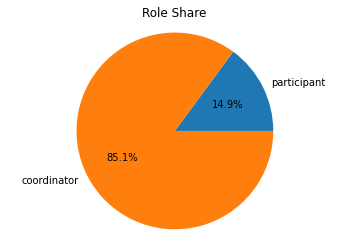

In [22]:
my_labels = ('participant','coordinator')
plt.pie(scaler.Count,labels=my_labels,autopct='%1.1f%%')
plt.title('Role Share')
plt.axis('equal')
plt.show()

In [23]:
# 3. top 20 countries 

In [25]:
a = data['country'].value_counts()[:20] 
b=a.index
a

DE    2018
FR    1506
IT    1459
ES     669
SE     477
BE     471
EL     436
FI     307
DK     301
CH     287
AT     282
NO     238
PL     224
PT     185
CZ     152
HU     143
IL      97
UK      94
NL      86
IE      79
Name: country, dtype: int64

In [26]:
b

Index(['DE', 'FR', 'IT', 'ES', 'SE', 'BE', 'EL', 'FI', 'DK', 'CH', 'AT', 'NO',
       'PL', 'PT', 'CZ', 'HU', 'IL', 'UK', 'NL', 'IE'],
      dtype='object')

In [27]:
cordis_countries = list(b)
type(cordis_countries)

list

Text(0, 0.5, 'Total No. of Approved projects')

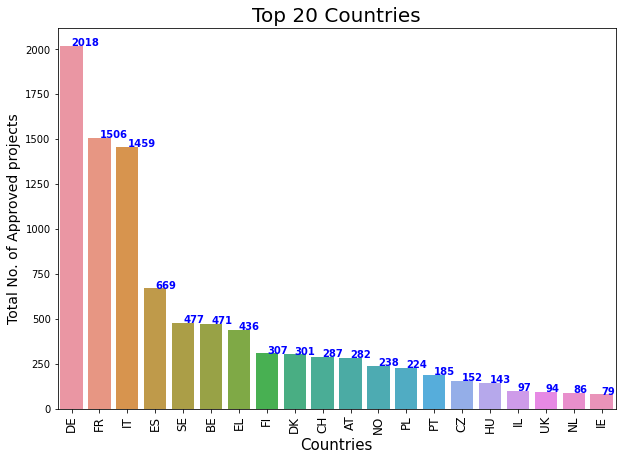

In [28]:
plt.figure(figsize=(10,7))
for i,v in enumerate(a):
    plt.text(i,v,v, color='blue', fontweight='bold')
sns.barplot(x=a.index,y=a,orient='v')
plt.xticks(rotation=90,fontsize=12,)
plt.title('Top 20 Countries',fontsize=20)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Total No. of Approved projects',fontsize=14)

In [29]:
# 4.  top 20 countries which contributed from maximum number of states

In [30]:
city_count = data.groupby('country')[['city']].count().sort_values(by = 'city', ascending  = False)[:20]

In [31]:
city_count

,city
country,
DE,2005
FR,1498
IT,1456
ES,664
SE,471
BE,467
EL,434
FI,302
DK,299


Text(0, 0.5, 'Total No. of cities')

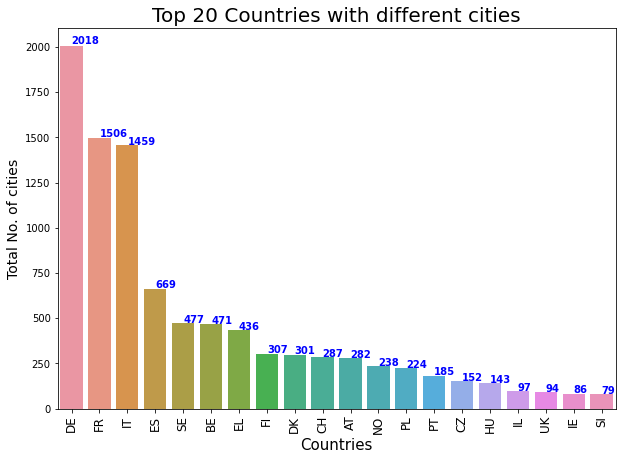

In [32]:
plt.figure(figsize=(10,7))
for i,v in enumerate(a):
    plt.text(i,v,v, color='blue', fontweight='bold')
sns.barplot(y=city_count.city,x=city_count.index,orient='v')
plt.xticks(rotation=90,fontsize=12,)
plt.title('Top 20 Countries with different cities',fontsize=20)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Total No. of cities',fontsize=14)

In [33]:
# 5. Which locality(street) is the major contributor in the cordis growth?

In [34]:
a = data[['city','street']].value_counts()[:20]
street_count = a.to_frame().reset_index().rename(columns={0 : 'Count'})

In [35]:
street_count

,city,street,Count
0,MUENCHEN,HANSASTRASSE 27C,53
1,LE CHESNAY,DOMAINE DE VOLUCEAU,29
2,ROMA,PIAZZALE ALDO MORO 7,26
3,ROSKILDE,Frederiksborgvej 399,23
4,BARCELONA,JORDI GIRONA 31,21
5,MADRID,AVENIDA RAMIRO DE MAEZTU 7,21
6,MUENCHEN,WITTELSBACHERPLATZ 2,20
7,LAUSANNE,ECUBLENS,19
8,MOL,Boeretang 200,18
9,PARIS CEDEX 15,31-33 RUE DE LA FEDERATION,18


In [36]:
x = street_count.street +' ('+ street_count.city + ')'

Text(0, 0.5, 'Total No. of cities')

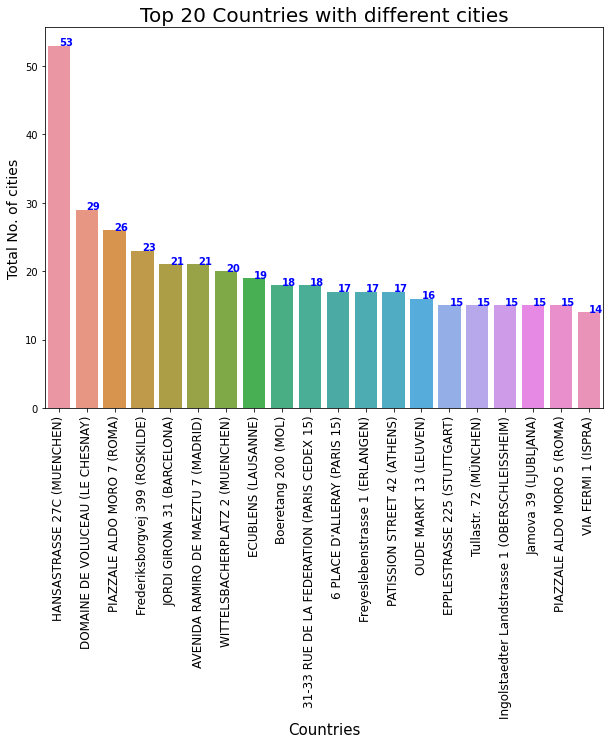

In [37]:
plt.figure(figsize=(10,7))
for i,v in enumerate(a):
    plt.text(i,v,v, color='blue', fontweight='bold')
sns.barplot(y=street_count.Count,x=x,orient='v')
plt.xticks(rotation=90,fontsize=12,)
plt.title('Top 20 Countries with different cities',fontsize=20)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Total No. of cities',fontsize=14)

In [38]:
# 6. max number of projects approved of a same name

In [39]:
a = data[['name','postCode']].value_counts()[:20]
name_count = a.to_frame().reset_index().rename(columns={0 : 'Count'}).drop(columns = ['postCode'])

In [40]:
name_count

,name,Count
0,FRAUNHOFER GESELLSCHAFT ZUR FOERDERUNG DER ANG...,53
1,UNIVERSIDAD POLITECNICA DE MADRID,31
2,PAUL SCHERRER INSTITUT,30
3,INSTITUT NATIONAL DE RECHERCHE EN INFORMATIQUE...,29
4,COMMISSION OF THE EUROPEAN COMMUNITIES,26
5,CONSIGLIO NAZIONALE DELLE RICERCHE,25
6,NUCLEAR RESEARCH INSTITUTE REZ A.S.,24
7,KATHOLIEKE UNIVERSITEIT LEUVEN,24
8,GSF-RESEARCH CENTER FOR ENVIRONMENT AND HEALTH,22
9,UNIVERSITAT POLITECNICA DE CATALUNYA,21


Text(0, 0.5, 'Total No. of projects approved')

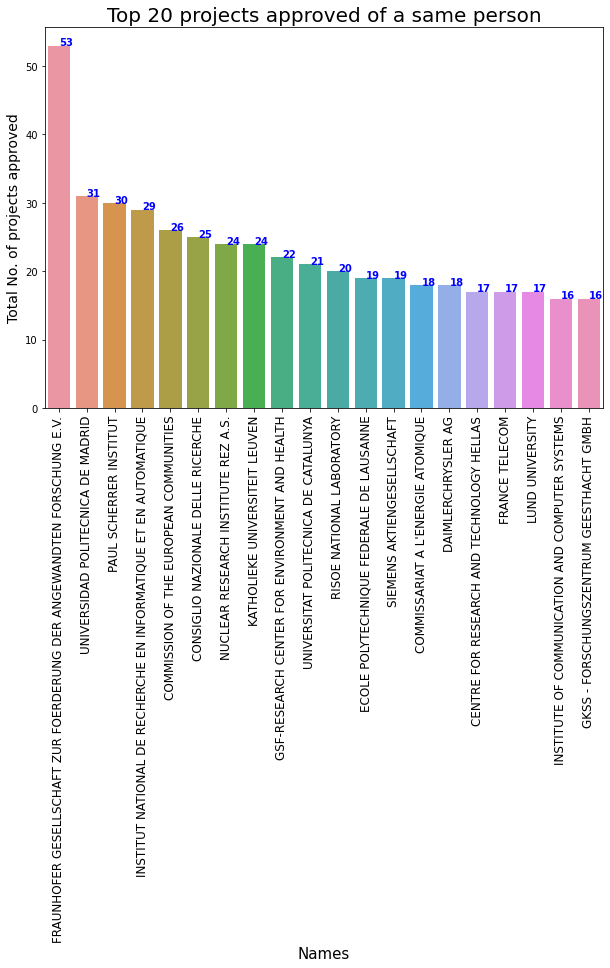

In [41]:
plt.figure(figsize=(10,7))
for i,v in enumerate(a):
    plt.text(i,v,v, color='blue', fontweight='bold')
sns.barplot(y=name_count.Count,x=name_count.name,orient='v')
plt.xticks(rotation=90,fontsize=12,)
plt.title('Top 20 projects approved of a same person',fontsize=20)
plt.xlabel('Names',fontsize=15)
plt.ylabel('Total No. of projects approved',fontsize=14)

In [42]:
    # 7. what are the some top projectAcronym approved by FP5

In [43]:
a = data[['projectAcronym']].value_counts()[:20]
name_count = a.to_frame().reset_index().rename(columns={0 : 'Count'})

In [44]:
name_count

,projectAcronym,Count
0,EURON,95
1,EUTIST-IMV,65
2,EUTIST-AMI,52
3,SCENET-2,52
4,OSNET,52
5,SILENCE-R,48
6,QUIPROCONE,46
7,BEEP,35
8,COLOGNET,34
9,EUTIST-M,34


<AxesSubplot:xlabel='projectAcronym'>

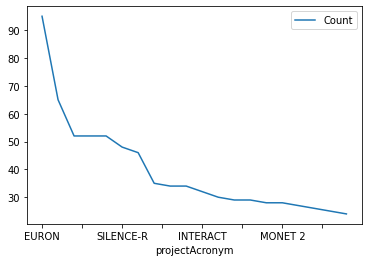

In [45]:
name_count.set_index('projectAcronym').plot.line()